# Sean Pharris
# Model: K Nearest Neighbor
# Data set: Customer data of a telecommunications company
# Date: Jan 21, 2022

## Part I: Research Question

A.

1.  What customers are likely to discontinue their services in the next few months?

2.  The goal of identifying the results to our research question can help the stakeholders to understand the turn over of customers in detail.
 

## Part II: Method Justification

B.  

1.  The K Nearest Neighbor algorithim will classify our data case by case to determine whether each data point will be a point indicating customer churn or not. That method includes:
    * Classifying all points
    * Determining what K will be (K is the number of surrounding points to classify the point at focus)
    * Generalizing the overall outcome with the number of total points
    
    Outcome: What customers will be at risk of customer churn

2.  Assumptions:
* KNN assumes that the data is in a feature space. More exactly, the data points are in a metric space. The data can be scalars or possibly even multidimensional vectors. Since the points are in feature space, they have a notion of distance – This need not necessarily be Euclidean distance although it is the one commonly used (Thirumuruganathan, S. (2010)).

* Each of the training data consists of a set of vectors and class label associated with each vector. In the simplest case , it will be either + or – (for positive or negative classes). But KNN , can work equally well with arbitrary number of classes (Thirumuruganathan, S. (2010)).

* We are also given a single number "k" . This number decides how many neighbors (where neighbors is defined based on the distance metric) influence the classification. This is usually a odd number if the number of classes is 2. If k=1 , then the algorithm is simply called the nearest neighbor algorithm (Thirumuruganathan, S. (2010)).

3.  The benefits of Python are vast but the main reason are the versatility, ease of use, and strong support from the community. There are many packages that make it easy to undertake the task of doing data analysis/data prediction.

* Some of those packages are:
    * Pandas and Numpy - make it easy to handle large sets of data
    * Seaborn and Matplotlib - make data visualization a breeze
    * Statsmodels and ScikitLearn - allow for easy data exploration and prediction
 

## Part III: Data Preparation

C.  

1.  The customers that have already discontinued their services in the last month have the binary variable as "yes" in the "Churn" column and "no" for those customers that have no discontinued their services. We will preprocess the data as 1s for "yes" and 0s for "no" to process the data. 

2.  The initial data set will include the variables below and our dependent variable will be "Churn", which is categorical.

* Continuous:

    'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse', 'CourteousExchange', 'EvidenceOfActiveListening'
       
* Categorical: 

    'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'


3.  Steps to prepare data:
    1. Read the data into the data frame ("df") using Pandas "read_csv()"
    2. Drop unneeded columns
    3. Changing the names of columns to make the data more understandable
    4. Make sure there are no null values
    5. Create dummy variables for categorical columns
    6. Remove the outliers of numerical data types

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-churn-data/churn_clean.csv
/kaggle/input/clean-churn-data/D207 D208 D209 Churn Data Consideration and Dictionary.pdf


In [2]:
import warnings

warnings.filterwarnings('ignore')

### Import the data

In [3]:
# Read in data set into the data frame 
df = pd.read_csv('../input/clean-churn-data/churn_clean.csv')

### Removing unneeded columns

In [4]:
# Drop unnecessary columns
df.drop(columns=['CaseOrder','UID', 'Customer_id','Interaction', 'Job','State','City','County','Zip','Lat','Lng', 'TimeZone', 'Marital'], inplace=True)

In [5]:
df.head()

,Population,Area,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Email,Contacts,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,38,Urban,0,68,28561.99,Male,No,7.978323,10,0,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,10446,Urban,1,27,21704.77,Female,Yes,11.699080,12,0,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3735,Urban,4,50,9609.57,Female,No,10.752800,9,0,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,13863,Suburban,1,48,18925.23,Male,No,14.913540,15,2,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,11352,Suburban,0,83,40074.19,Male,Yes,8.147417,16,2,...,149.948316,271.493436,4,4,4,3,4,4,4,5


### Changing the name of columns to make the data more understandable

In [6]:
# Renaming the survey columns
df.rename(columns = {'Item1':'TimelyResponse', 
                    'Item2':'TimelyFixes', 
                     'Item3':'TimelyReplacements', 
                     'Item4':'Reliability', 
                     'Item5':'Options', 
                     'Item6':'RespectfulResponse', 
                     'Item7':'CourteousExchange', 
                     'Item8':'EvidenceOfActiveListening'}, 
          inplace=True)

In [7]:
df.columns

Index(['Population', 'Area', 'Children', 'Age', 'Income', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'TimelyResponse', 'TimelyFixes',
       'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse',
       'CourteousExchange', 'EvidenceOfActiveListening'],
      dtype='object')

### Check for null values in the data set

In [8]:
df.isnull().sum()

Population                   0
Area                         0
Children                     0
Age                          0
Income                       0
Gender                       0
Churn                        0
Outage_sec_perweek           0
Email                        0
Contacts                     0
Yearly_equip_failure         0
Techie                       0
Contract                     0
Port_modem                   0
Tablet                       0
InternetService              0
Phone                        0
Multiple                     0
OnlineSecurity               0
OnlineBackup                 0
DeviceProtection             0
TechSupport                  0
StreamingTV                  0
StreamingMovies              0
PaperlessBilling             0
PaymentMethod                0
Tenure                       0
MonthlyCharge                0
Bandwidth_GB_Year            0
TimelyResponse               0
TimelyFixes                  0
TimelyReplacements           0
Reliabil

### Below, we will find our categorical data types

In [9]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 18 categorical variables

The categorical variables are : ['Area', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


In [10]:
# view the categorical variables

print(categorical)

['Area', 'Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


In [11]:
# check for cardinality in categorical variables

for var in df:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Population  contains  5933  labels
Area  contains  3  labels
Children  contains  11  labels
Age  contains  72  labels
Income  contains  9993  labels
Gender  contains  3  labels
Churn  contains  2  labels
Outage_sec_perweek  contains  9986  labels
Email  contains  23  labels
Contacts  contains  8  labels
Yearly_equip_failure  contains  6  labels
Techie  contains  2  labels
Contract  contains  3  labels
Port_modem  contains  2  labels
Tablet  contains  2  labels
InternetService  contains  3  labels
Phone  contains  2  labels
Multiple  contains  2  labels
OnlineSecurity  contains  2  labels
OnlineBackup  contains  2  labels
DeviceProtection  contains  2  labels
TechSupport  contains  2  labels
StreamingTV  contains  2  labels
StreamingMovies  contains  2  labels
PaperlessBilling  contains  2  labels
PaymentMethod  contains  4  labels
Tenure  contains  9996  labels
MonthlyCharge  contains  750  labels
Bandwidth_GB_Year  contains  10000  labels
TimelyResponse  contains  7  labels
TimelyFixe

## Below we will find out numerical data types and remove outliers

In [12]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse', 'CourteousExchange', 'EvidenceOfActiveListening']


#### Now we will look for outliers

In [13]:
# view summary statistics in numerical variables

print(round(df.describe()),2)

       Population  Children      Age    Income  Outage_sec_perweek    Email  \
count     10000.0   10000.0  10000.0   10000.0             10000.0  10000.0   
mean       9757.0       2.0     53.0   39807.0                10.0     12.0   
std       14433.0       2.0     21.0   28200.0                 3.0      3.0   
min           0.0       0.0     18.0     349.0                 0.0      1.0   
25%         738.0       0.0     35.0   19225.0                 8.0     10.0   
50%        2910.0       1.0     53.0   33171.0                10.0     12.0   
75%       13168.0       3.0     71.0   53246.0                12.0     14.0   
max      111850.0      10.0     89.0  258901.0                21.0     23.0   

       Contacts  Yearly_equip_failure   Tenure  MonthlyCharge  \
count   10000.0               10000.0  10000.0        10000.0   
mean        1.0                   0.0     35.0          173.0   
std         1.0                   1.0     26.0           43.0   
min         0.0             

Variables that may contain outliers:

* Population
* Income
* Bandwidth_GB_Year

Text(0, 0.5, 'Bandwidth_GB_Year')

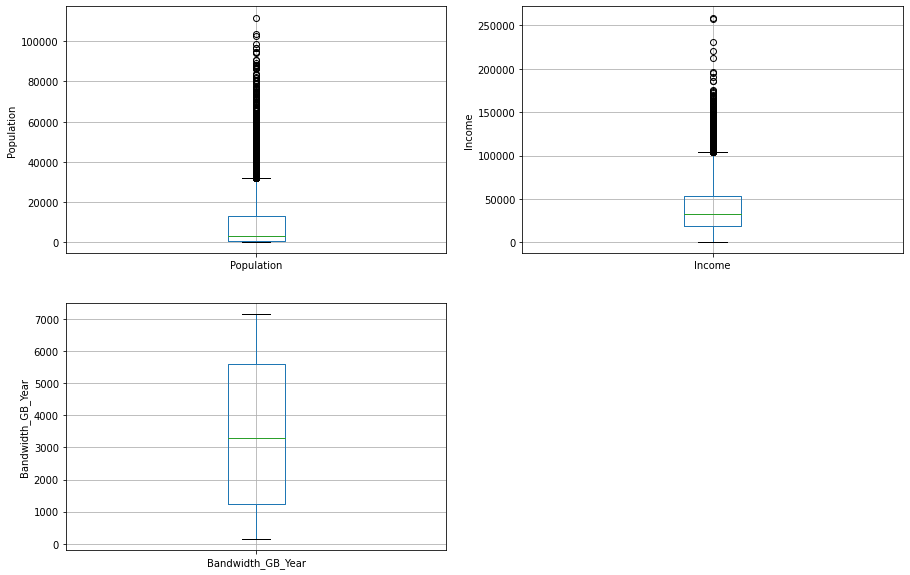

In [14]:
# draw boxplots to visualize outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Population')
fig.set_title('')
fig.set_ylabel('Population')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Income')
fig.set_title('')
fig.set_ylabel('Income')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Bandwidth_GB_Year')
fig.set_title('')
fig.set_ylabel('Bandwidth_GB_Year')

Text(0, 0.5, 'Churn')

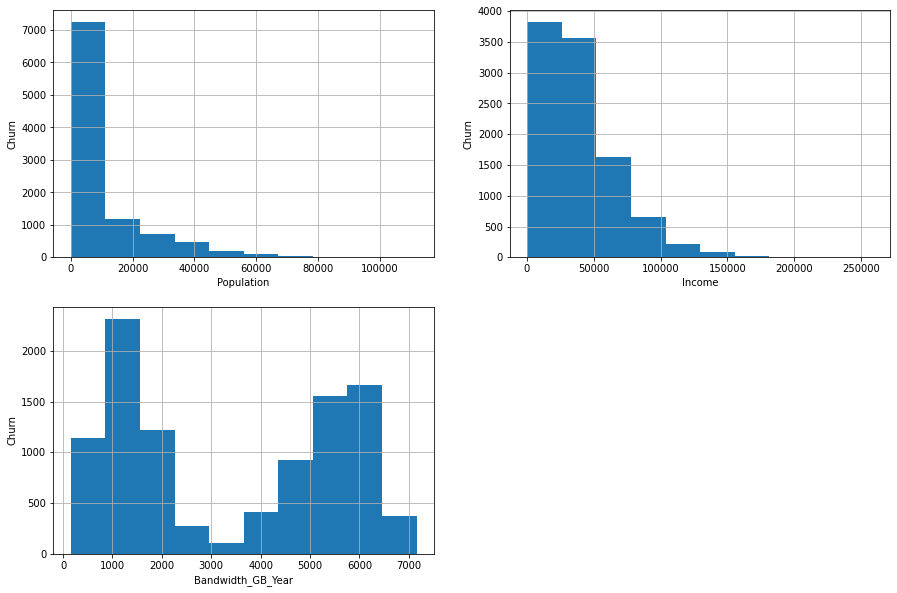

In [15]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Population.hist(bins=10)
fig.set_xlabel('Population')
fig.set_ylabel('Churn')


plt.subplot(2, 2, 2)
fig = df.Income.hist(bins=10)
fig.set_xlabel('Income')
fig.set_ylabel('Churn')


plt.subplot(2, 2, 3)
fig = df.Bandwidth_GB_Year.hist(bins=10)
fig.set_xlabel('Bandwidth_GB_Year')
fig.set_ylabel('Churn')

Removing the outliers in our numerical data types
* Bandwidth_GB_Year does not appear to be skewed.
* Population and income apprear to be skewed so we will conduct an interquantile range now.

In [16]:
# find outliers for Population

IQR = df.Population.quantile(0.75) - df.Population.quantile(0.25)
lower = df.Population.quantile(0.25) - (IQR * 3)
upper = df.Population.quantile(0.75) + (IQR * 3)
print('Population outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower, upperboundary=upper))

Population outliers are values < -36552.0 or > 50458.0


In [17]:
# find outliers for Income

IQR = df.Income.quantile(0.75) - df.Income.quantile(0.25)
lower = df.Income.quantile(0.25) - (IQR * 3)
upper = df.Income.quantile(0.75) + (IQR * 3)
print('Income outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=lower, upperboundary=upper))

Income outliers are values < -82839.64 or > 155310.5275


Fixing the outliers in our numerical data types

* We have seen that the Population and Income columns contain outliers. 
* We will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [18]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [df]:
    df3['Population'] = max_value(df3, 'Population', 50458.0)
    df3['Income'] = max_value(df3, 'Income', 155310.5275)

In [19]:
print(df.Population.max(), df.Income.max())

50458.0 155310.5275


Text(0, 0.5, 'Churn')

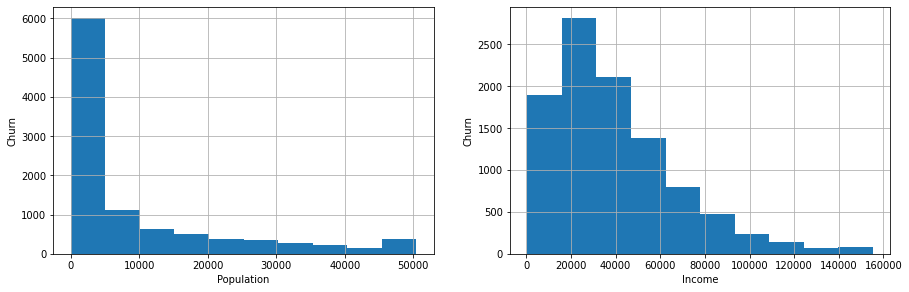

In [20]:
# plot histogram to check distribution of removed outliers 

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Population.hist(bins=10)
fig.set_xlabel('Population')
fig.set_ylabel('Churn')


plt.subplot(2, 2, 2)
fig = df.Income.hist(bins=10)
fig.set_xlabel('Income')
fig.set_ylabel('Churn')

### C4.  Provide a copy of the cleaned data set.

In [21]:
# Desired data set
df.to_csv('KNN_churn.csv', index=False)

### D1.  Split the data into training and test data sets and provide the file(s).

In [22]:
from sklearn.model_selection import train_test_split

# Create arrays for the features and the response variable

train, test = train_test_split(df, test_size = 0.2, random_state = 0)

# check the shape of X_train and X_test

train.shape, test.shape

((8000, 37), (2000, 37))

In [23]:
# Put training and test data into their own CSVs.

train.to_csv('training_churn.csv', index=False)

test.to_csv('test_churn.csv', index=False)

### Now that we have split the test/training data, we will split the dependent variable "Churn" from the independent variables.

In [24]:
# create target(predictor) variable 

X = df.drop(['Churn'], axis=1)

y = df['Churn']

In [25]:
# removing churn from categorical list because we will loop through the categorical in the encoding below

categorical.remove('Churn')

categorical

['Area',
 'Gender',
 'Techie',
 'Contract',
 'Port_modem',
 'Tablet',
 'InternetService',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

In [26]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for feature in categorical:
    X.loc[:, feature] = le.fit_transform(X.loc[:, feature])

In [27]:
# normalizaing/feature scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [28]:
# split X and y into training and testing sets

from sklearn.model_selection import cross_val_score, train_test_split

# Set seed for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 36), (2000, 36))

## Part IV: Analysis

### D2.  Analysis and intermediate calculations

In [29]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 3
random_state = 0

# Create a k-NN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the method's model
knn.fit(X_train, y_train)

# predict the results and get accuracy of the model
y_pred = knn.predict(X_test)

### D3.  Code is above.
 

## Part V: Data Summary and Implications

### E1.  Accuracy and AUC

In [30]:
measure = le.fit_transform(y_pred)
measure_test = le.fit_transform(y_test)
measure_test

array([0, 0, 1, ..., 1, 1, 0])

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(measure_test, measure)


model_acc = 'Model accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred))
print(model_acc)
mse_acc = 'MSE accuracy: {0:0.4f}'. format(mse)
print(mse_acc)
r_squared = 'R-squared value:', knn.score(X_test,y_test)
print(r_squared)

Model accuracy: 0.8065
MSE accuracy: 0.1935
('R-squared value:', 0.8065)


In [32]:
from sklearn.metrics import classification_report

initial_model_report = classification_report(y_test, y_pred)
# classification metrics
print(initial_model_report)

              precision    recall  f1-score   support

          No       0.86      0.89      0.87      1486
         Yes       0.64      0.58      0.61       514

    accuracy                           0.81      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.80      0.81      0.80      2000



In [33]:
# Import sklearn confusion_matrix & generate results

from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
print(cfm)

[[1316  170]
 [ 217  297]]


<AxesSubplot:>

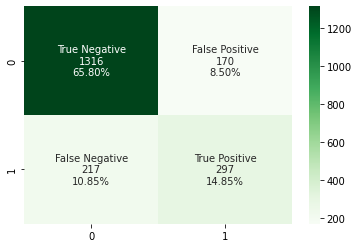

In [34]:
import seaborn as sns

# chart confusion matrix
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

cat_amount = ["{0:0.0f}".format(value) for value in cfm.flatten()]

cat_percent = ["{0:.2%}".format(value) for value in cfm.flatten()/np.sum(cfm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(categories,cat_amount,cat_percent)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cfm, annot=labels, fmt='', cmap='Greens')

In [35]:
from sklearn.metrics import roc_auc_score

auc_est = (roc_auc_score(measure_test, measure))

print("The AUC on validation dataset is", auc_est)

The AUC on validation dataset is 0.7317099674785678


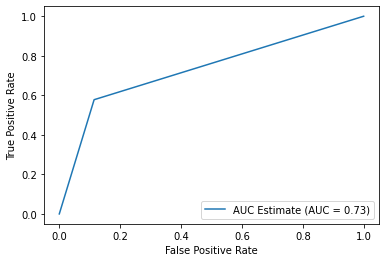

In [36]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(measure_test, measure)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='AUC Estimate')
display.plot()

plt.show()

### Accuracy and AUC Conclusion:
    * The accuracy of the model is a .8
    * The precision is .8 as well
    * The area under the curve is approximately .6.
        * When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values (Bhandari, A. (2020)). 

### Now going to attempt improve accuracy and reduce the dimensions of the model for efficiency

In [37]:
to_be_reduced_X = X_test
to_be_reduced_y = y_test

In [38]:
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_classification

to_be_reduced_X, to_be_reduced_y = make_classification(n_samples=len(to_be_reduced_X), n_features=len(to_be_reduced_X.columns), random_state=1)

# define the model
model = KNeighborsClassifier()

# fit the model
model.fit(to_be_reduced_X, to_be_reduced_y)

KNeighborsClassifier()

In [39]:
# find the feature importance

results = permutation_importance(model, to_be_reduced_X, to_be_reduced_y, scoring='accuracy')

importance = results.importances_mean

Population : 0, Score: 0.00350
Area : 1, Score: 0.00410
Children : 2, Score: -0.00200
Age : 3, Score: 0.00680
Income : 4, Score: -0.00120
Gender : 5, Score: 0.00450
Outage_sec_perweek : 6, Score: 0.00430
Email : 7, Score: 0.00740
Contacts : 8, Score: 0.27640
Yearly_equip_failure : 9, Score: 0.00490
Techie : 10, Score: 0.00250
Contract : 11, Score: 0.00330
Port_modem : 12, Score: 0.01050
Tablet : 13, Score: 0.00020
InternetService : 14, Score: 0.00300
Phone : 15, Score: -0.00120
Multiple : 16, Score: 0.00170
OnlineSecurity : 17, Score: 0.00540
OnlineBackup : 18, Score: -0.00290
DeviceProtection : 19, Score: 0.00110
TechSupport : 20, Score: 0.00430
StreamingTV : 21, Score: 0.00070
StreamingMovies : 22, Score: 0.00240
PaperlessBilling : 23, Score: 0.00460
PaymentMethod : 24, Score: 0.00750
Tenure : 25, Score: -0.00050
MonthlyCharge : 26, Score: 0.00420
Bandwidth_GB_Year : 27, Score: 0.00070
TimelyResponse : 28, Score: 0.00920
TimelyFixes : 29, Score: 0.00080
TimelyReplacements : 30, Score

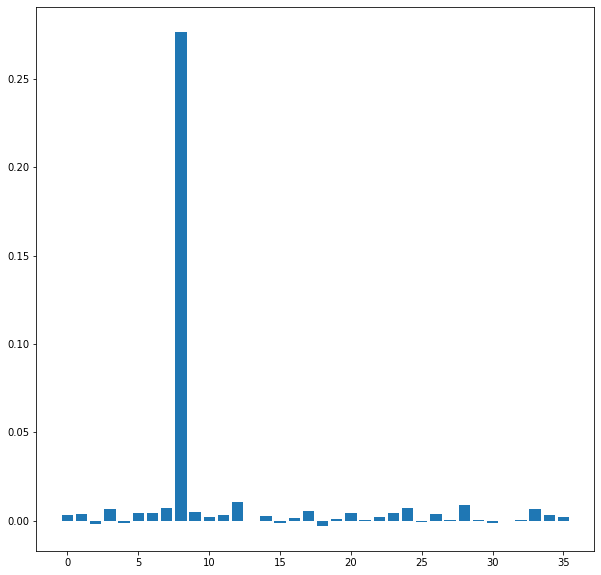

In [40]:
# summarize feature importance

for i,v in enumerate(importance):
    print(X_test.columns[i], ': %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.figure(figsize=(10, 10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [41]:
feats = []
for i,v in enumerate(importance):
    if v > 0.003:
        feats.append(X_test.columns[i])
        print(X_test.columns[i], ': %0d, Score: %.5f' % (i,v))
print(len(feats))

Population : 0, Score: 0.00350
Area : 1, Score: 0.00410
Age : 3, Score: 0.00680
Gender : 5, Score: 0.00450
Outage_sec_perweek : 6, Score: 0.00430
Email : 7, Score: 0.00740
Contacts : 8, Score: 0.27640
Yearly_equip_failure : 9, Score: 0.00490
Contract : 11, Score: 0.00330
Port_modem : 12, Score: 0.01050
InternetService : 14, Score: 0.00300
OnlineSecurity : 17, Score: 0.00540
TechSupport : 20, Score: 0.00430
PaperlessBilling : 23, Score: 0.00460
PaymentMethod : 24, Score: 0.00750
MonthlyCharge : 26, Score: 0.00420
TimelyResponse : 28, Score: 0.00920
RespectfulResponse : 33, Score: 0.00670
CourteousExchange : 34, Score: 0.00340
19


In [42]:
feats

['Population',
 'Area',
 'Age',
 'Gender',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Contract',
 'Port_modem',
 'InternetService',
 'OnlineSecurity',
 'TechSupport',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharge',
 'TimelyResponse',
 'RespectfulResponse',
 'CourteousExchange']

In [43]:
reduced_X_df = X_test[feats]
reduced_y_df = y_test

In [44]:
reduced_X_df

,Population,Area,Age,Gender,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Contract,Port_modem,InternetService,OnlineSecurity,TechSupport,PaperlessBilling,PaymentMethod,MonthlyCharge,TimelyResponse,RespectfulResponse,CourteousExchange
9394,-0.715290,-1.22591,0.286097,-0.957245,0.087226,0.325209,-1.005852,-0.625864,-0.835609,1.033770,0.181299,1.340306,1.290994,0.836721,0.396720,0.578999,-0.472948,-0.481165,-1.467742
898,-0.096659,1.22591,-1.501528,-0.957245,0.364507,-1.327276,-1.005852,0.946658,1.556629,-0.967333,0.181299,-0.746098,-0.774597,-1.195142,1.329960,-0.644237,-0.472948,1.453943,0.476931
2398,-0.715443,-1.22591,1.445638,0.881489,-1.293497,-0.996779,3.041027,-0.625864,0.360510,-0.967333,-1.177763,-0.746098,-0.774597,0.836721,-1.469759,0.640589,-1.436576,-0.481165,-1.467742
5906,0.433704,1.22591,-1.404900,0.881489,0.213289,-0.005288,1.017588,2.519179,-0.835609,1.033770,0.181299,1.340306,1.290994,0.836721,0.396720,0.287369,-1.436576,-0.481165,-0.495406
2343,-0.716357,0.00000,-1.018386,2.720222,2.312581,-0.335785,0.005868,-0.625864,-0.835609,1.033770,1.540360,1.340306,-0.774597,0.836721,0.396720,1.165656,0.490679,0.486389,1.449268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,1.580110,-1.22591,1.493953,-0.957245,1.113434,-0.335785,-1.005852,0.946658,1.556629,1.033770,-1.177763,-0.746098,-0.774597,0.836721,0.396720,-1.109993,0.490679,0.486389,0.476931
2899,0.834448,1.22591,1.397324,0.881489,0.748975,-0.996779,-1.005852,2.519179,1.556629,1.033770,1.540360,-0.746098,-0.774597,0.836721,-0.536519,-0.061892,-0.472948,-0.481165,-0.495406
9549,-0.500677,0.00000,1.204067,-0.957245,0.046390,-0.005288,-1.005852,0.946658,-0.835609,1.033770,0.181299,1.340306,-0.774597,0.836721,-0.536519,-0.003782,0.490679,0.486389,-0.495406
2740,-0.702039,0.00000,0.914182,-0.957245,0.035960,-0.666282,0.005868,0.946658,-0.835609,-0.967333,1.540360,-0.746098,1.290994,0.836721,-0.536519,-1.051440,3.381562,1.453943,0.476931


In [45]:
reduced_X_train = X_train[feats]
reduced_y_train = y_train

In [46]:
knn.fit(reduced_X_train, reduced_y_train)

print('R-squared value:', knn.score(reduced_X_df,reduced_y_df))

R-squared value: 0.71


In [47]:
print('Initial model:\n\n', 
      model_acc, 
      '\n\n', 'Best Possible score for MSE is 0\n', 
      mse_acc, 
      '\n\n', 
      'Best Possible score for R-Squared is 1\n', 
      r_squared, "\n\n\n")

y_pred_reduced = knn.predict(reduced_X_df)

measure = le.fit_transform(y_pred_reduced)
measure_test = le.fit_transform(reduced_y_df)

mse = mean_squared_error(measure_test, measure)

print('Reduced model:\n\n',
      'Model accuracy: {0:0.4f}\n\n'. format(accuracy_score(reduced_y_df, y_pred)),
      'Best Possible score for MSE is 0\n',
      'MSE accuracy: {0:0.4f}\n\n'. format(mse),
      'Best Possible score for R-Squared is 1\n',
      'R-squared value:', knn.score(reduced_X_df,reduced_y_df)
     )

Initial model:

 Model accuracy: 0.8065 

 Best Possible score for MSE is 0
 MSE accuracy: 0.1935 

 Best Possible score for R-Squared is 1
 ('R-squared value:', 0.8065) 



Reduced model:

 Model accuracy: 0.8065

 Best Possible score for MSE is 0
 MSE accuracy: 0.2900

 Best Possible score for R-Squared is 1
 R-squared value: 0.71


In [48]:
# classification metrics

initial_model_report

reduced_model_report = classification_report(reduced_y_df, y_pred_reduced)

print("Initial model report:\n", initial_model_report, "\n\n\n", "Reduced model report:\n", reduced_model_report)

Initial model report:
               precision    recall  f1-score   support

          No       0.86      0.89      0.87      1486
         Yes       0.64      0.58      0.61       514

    accuracy                           0.81      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.80      0.81      0.80      2000
 


 Reduced model report:
               precision    recall  f1-score   support

          No       0.78      0.85      0.81      1486
         Yes       0.41      0.31      0.36       514

    accuracy                           0.71      2000
   macro avg       0.60      0.58      0.58      2000
weighted avg       0.69      0.71      0.70      2000



In [49]:
y_pred_reduced = knn.predict(reduced_X_df)
y_pred_reduced = pd.DataFrame({'Churn': y_pred_reduced})
y_pred_reduced.value_counts()

Churn
No       1614
Yes       386
dtype: int64

#### E2.  Results and implications
    * In the results from the analysis we found in a sample size of 2000 that 497 customers are predicted to churn. 
    * We oddly found that the contacts variable had the highest importance of all the features. 
    * The implication that we ran into is that the model actually ran better with more features than less. The made an initial model and found the most important features, then removed the unimportant features and the model was less accurate and had a worst MSE.
    * The most important features were:
     'Area',
     'Age',
     'Gender',
     'Outage_sec_perweek',
     'Email',
     'Contacts',
     'Yearly_equip_failure',
     'Contract',
     'Port_modem',
     'Tablet',
     'PaperlessBilling',
     'PaymentMethod',
     'MonthlyCharge',
     'TimelyResponse',
     'RespectfulResponse'
    
### E3.  Discuss one limitation of your data analysis.
    * This technique could be really time consuming because of all the different variables (not features) of the model that could be configured. K can be altered, which can requires for the model to be ran every time and the feature finding algo required quite a bit of computational power. 

### E4.  Recommendation
    * Based off of the information gained from the analysis, the top 3 features to the customers are the amount of contacts the customer has, if they customer has a port modem, and the kind of payment method the customer has; meaning that the company needs to focus on these features to keep the customers from churning. The accuracy of the model was not incredibly accurate, so I would recommend additional analysis with other techniques.
    
 

## Part VI: Demonstration

F.  Panopto video:
 https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=163ba291-0efe-4e87-9d4b-ae240168826b

G.  Third party code:

SciKit-Learn (2022). sklearn.neighbors.KNeighborsClassifier. Scikit Learn. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

H.  References:
Bhandari, A. (2020). AUC-ROC Curve in Machine Learning Clearly Explained. Analytics Vidhya https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

Thirumuruganathan, S. (2010). A Detailed Introduction to K-Nearest Neighbor (KNN) Algorithm. Wordpress. https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/